### PROBLEM STATEMENT :  
### Develop a sophisticated predictive model to estimate diamond prices based on carat, cut, color, clarity, depth, table, x, y, and z features, aiming to enhance pricing accuracy and decision-making in the diamond industry.


- Objective:
    -The objective of this project is to develop a sophisticated predictive model that can accurately estimate diamond prices based on the given features: carat, cut, color, clarity, depth, table, X, Y, and Z. By leveraging advanced machine learning techniques, the model aims to capture the intricate relationships and patterns within the data to provide reliable price predictions for diamonds.

#### FLOW:
- EDA
- Hypothesis Test (chisq for cat)
- If required, combine X ,Y ,Z
- LINEAR REG, LASSO, RIDGE, RANDOM FOREST, DECISION TREE
- INTERPRET THE ABOVE 
- MAKE STREAMLIT APP 

### DESCRIPTION:

**"Four Cs" used to evaluate the quality and value of a diamond:**

**1. Carat:** 
- Carat weight refers to the measurement of a diamond's weight. One carat is equal to 200 milligrams. Diamonds with higher carat weights are generally rarer and more valuable, as larger diamonds are less common to find in nature. 
- Carat weight is an important factor in determining the overall size and visual impact of a diamond.


**2. Cut:** 
- The cut of a diamond refers to how well it has been shaped and faceted. The cut directly impacts the diamond's brilliance and sparkle. 
- A well-cut diamond reflects and refracts light in a way that maximizes its natural beauty. The cut is evaluated based on factors such as the proportions, symmetry, and polish of the diamond. The quality of the cut can significantly affect the diamond's value and visual appeal.


**3. Color:** 
- Color grading assesses the presence of any color in a white diamond. The Gemological Institute of America (GIA) uses a scale from D (colorless) to Z (light yellow or brown) to classify the color of diamonds.
- As the color grade moves down the scale, the presence of yellow or brown hues becomes more prominent, affecting the diamond's value.


**4. Clarity:**
- Clarity refers to the presence of any internal or external flaws, known as inclusions and blemishes, respectively, in a diamond. The clarity grade evaluates the number, size, visibility, and position of these imperfections. 
- The GIA grades clarity on a scale from Flawless (no inclusions or blemishes visible under 10x magnification) to Included (inclusions visible to the naked eye). Diamonds with higher clarity grades, indicating fewer and less noticeable flaws, are more valuable and sought after.



### EDA

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [159]:
#read the dataset
df=pd.read_excel('DiamondsPrices.xlsx')

In [160]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [161]:
#no NaN values
df.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [162]:
#check for null
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [163]:
df.shape

(53940, 10)

In [164]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [165]:
df.info()
#checking for datatypes of each feature 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [166]:
#summary statistics
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Interpretation:** 
- From the count, we can say there are zero missing values 
    - Average price of diamonds, irrespective of the 'FOUR C's' is 3932
    - 75% of diamonds are 1 carat and below, the model will be naturally prone to predicting appropriately for carat less than or equal to one
    - Average dimension of diamonds is **5x5x3** and the price is $3932
    - The minimum dimension shows that there might be missing values in the dataset 
    - This can also mean that diamonds with x=0, dont necessarily have to have y=0 and z=0 

### UNIVARIATE ANALYSIS

### Categorical Features:

In [167]:
df.cut.unique() 

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [168]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [169]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [170]:
df_cat = df.select_dtypes(include='object')

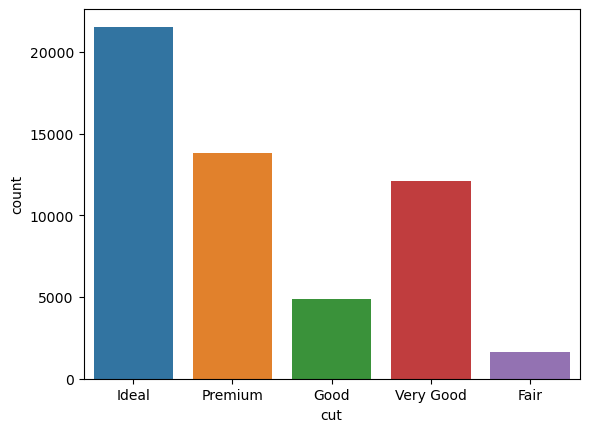

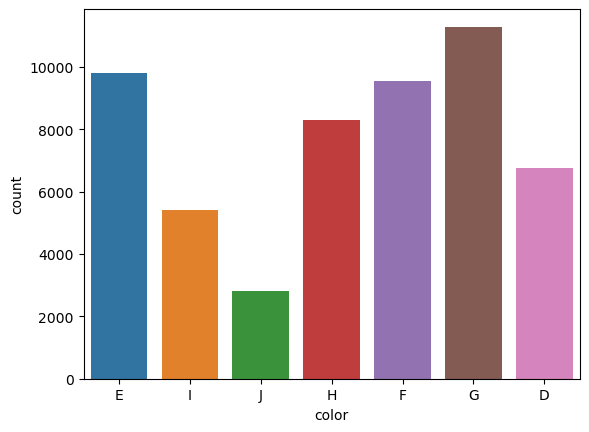

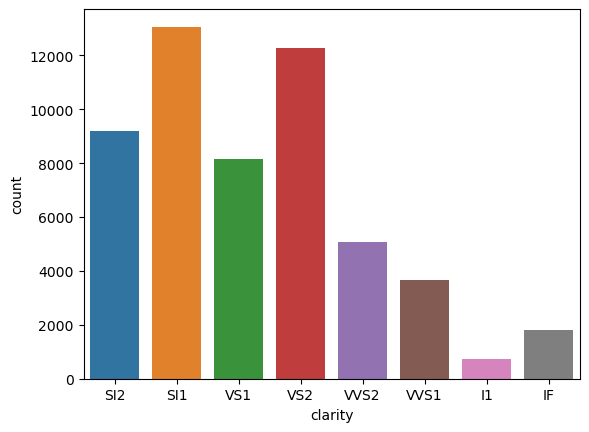

In [171]:
# def countplot:
for col in df_cat:
    sns.countplot(data=df_cat,x=col)
    plt.show()

### INTERPRETAION:
- Most of the diamonds are in the ideal cut category, and the least cut are the fair ones 
- Diamonds of clarity -IL is the least in the dataset 
- Color D,E,F,G,H are fairly higher, which means that majority of the diamond quality in this dataset is good
- There are no poor-cut iamonds in the data 
- Overall, the quality of diamonds in this dataset fall on the good side

### Numeric Features:

Plot a density plot to study the distribution of the features, check for skewness, and kurtosis

<AxesSubplot:xlabel='carat', ylabel='Density'>

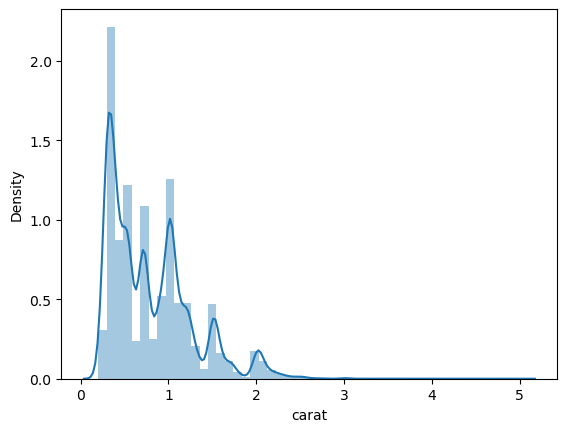

In [172]:
sns.distplot(df['carat']) 

<AxesSubplot:xlabel='depth', ylabel='Density'>

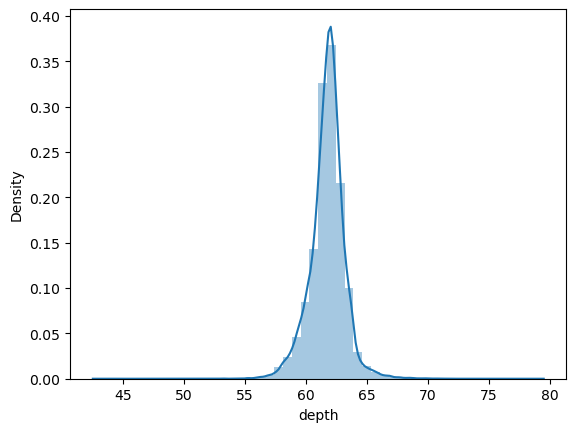

In [173]:
sns.distplot(df['depth']) 

<AxesSubplot:xlabel='table', ylabel='Density'>

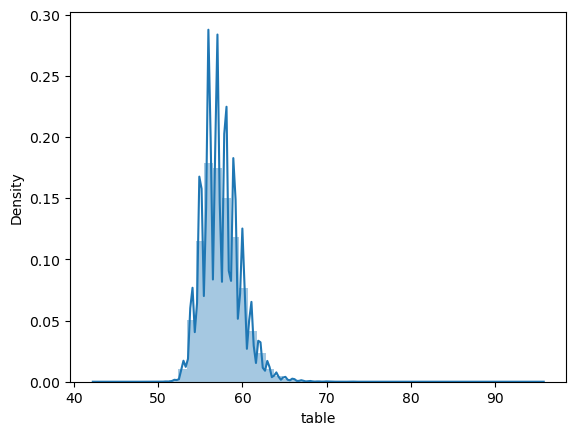

In [174]:
sns.distplot(df['table']) 

<AxesSubplot:xlabel='x', ylabel='Density'>

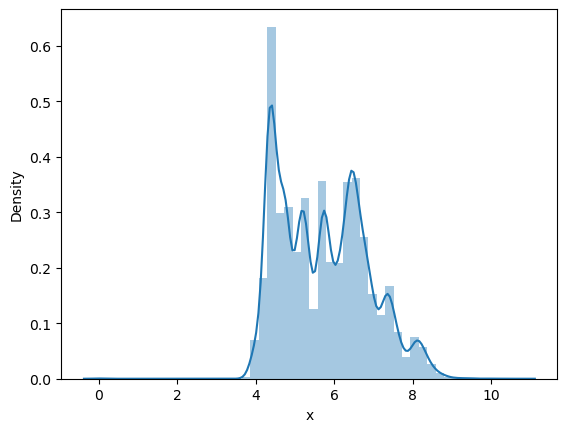

In [175]:
sns.distplot(df['x']) 

<AxesSubplot:xlabel='y', ylabel='Density'>

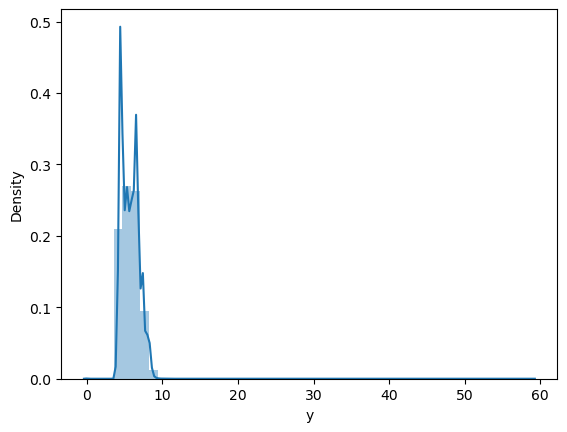

In [176]:
sns.distplot(df['y']) 

<AxesSubplot:xlabel='z', ylabel='Density'>

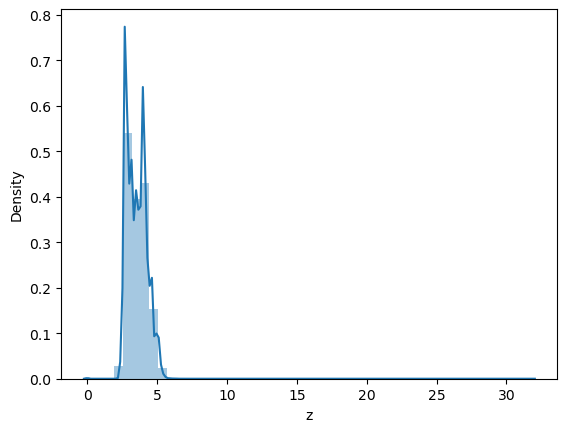

In [177]:
sns.distplot(df['z']) 

### Interpretation:
- Depth is the only feature that appears to be normally distributed , it is leptokurtic, i.e., with less variation
- y & z seem to be right skewed, while x seems to be left skewed (this could be because of the 5 carat diamond in data)


### Bivariate Variate Analysis

In [178]:
df_num = df.select_dtypes(include='number')

In [179]:
df_num.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


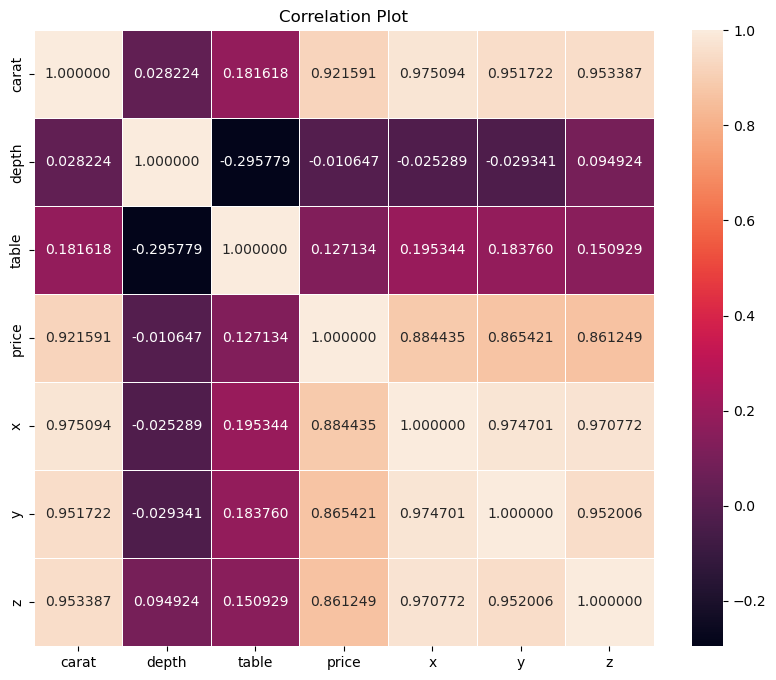

In [180]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,fmt='2f',linewidths=0.5)
plt.title("Correlation Plot")
plt.show()

### Inferences :
- Carat is highly correlated with the label - price, and also the dimensions of the diamond
- Again, price is highly correlated with the do=imensions x,y,z and most with the carat
   - This means with increase in carat, price will also increase by a certain factor/parameter 
- The dimensions x,y,z are highly correlated with each other
   - This leaves an opportunity to combine the features x,y,z into a single 'volume' column to prevent the effect of multicollinearity 


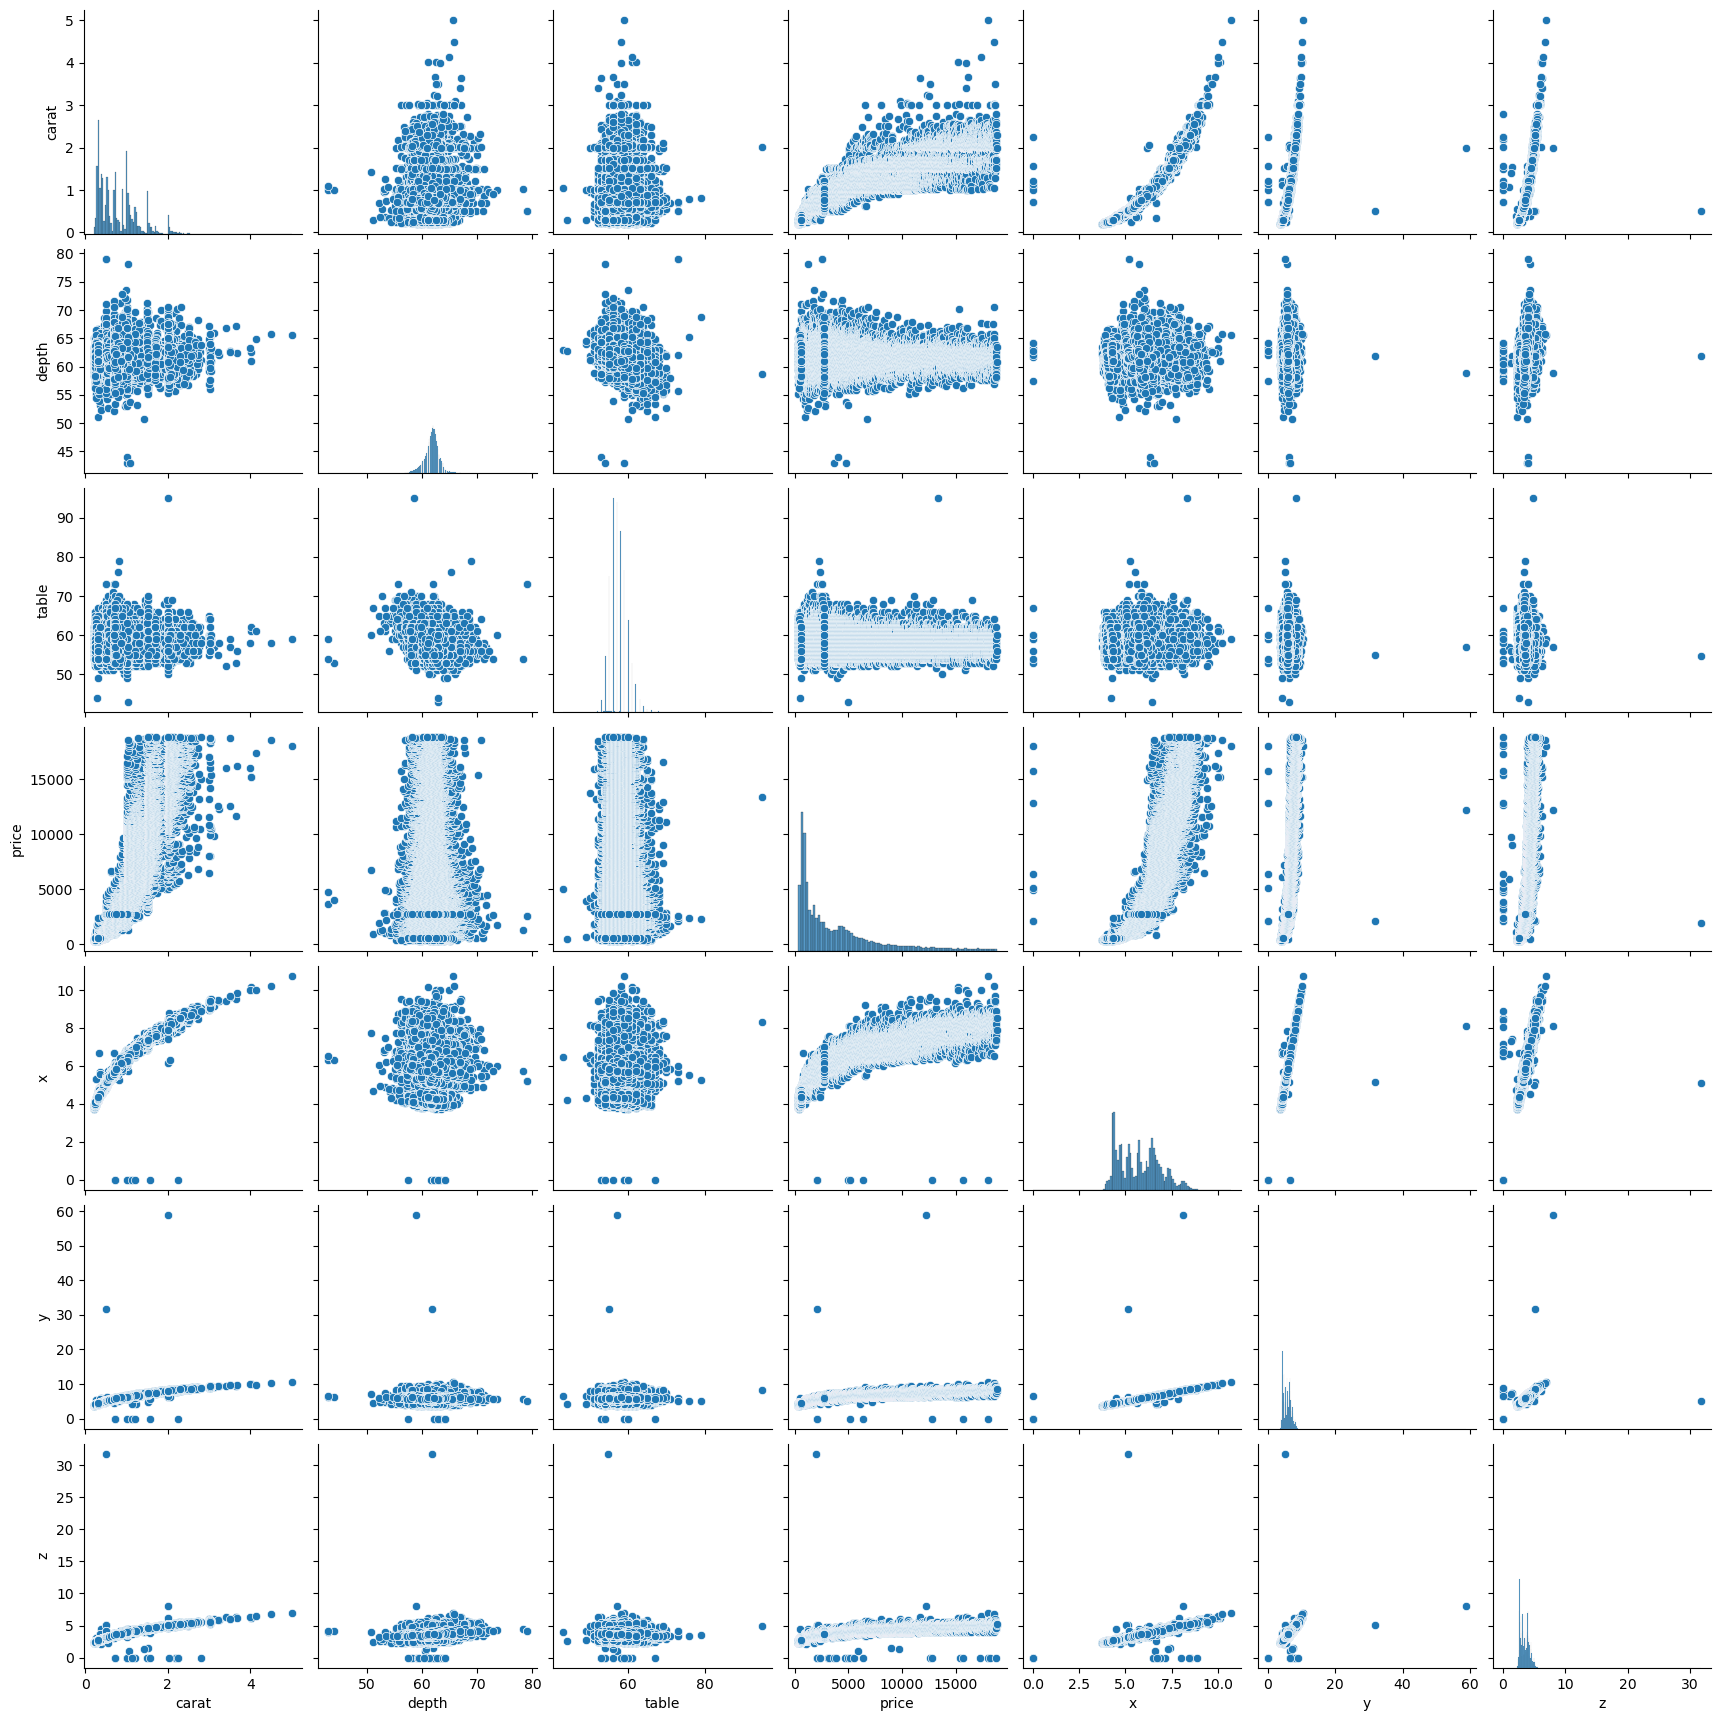

In [181]:
sns.pairplot(df_num)
plt.show()

In [182]:
### bivariate for boxplot

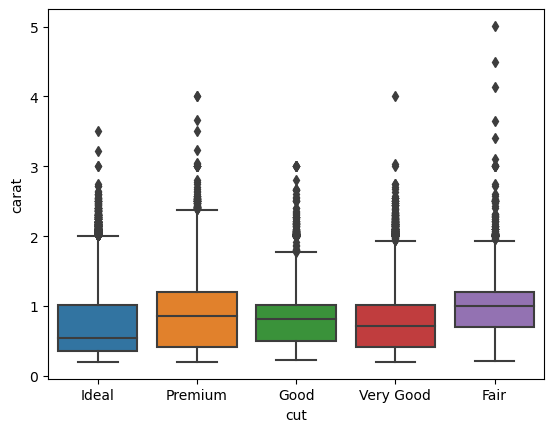

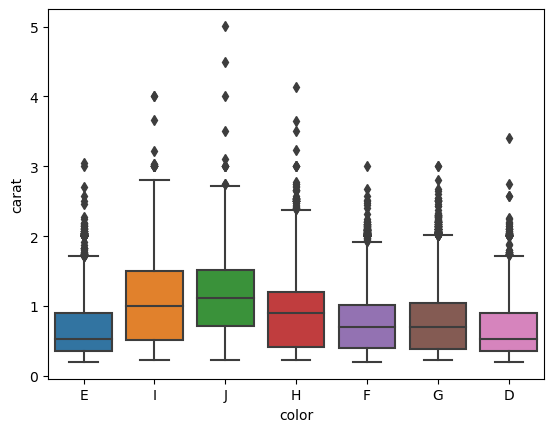

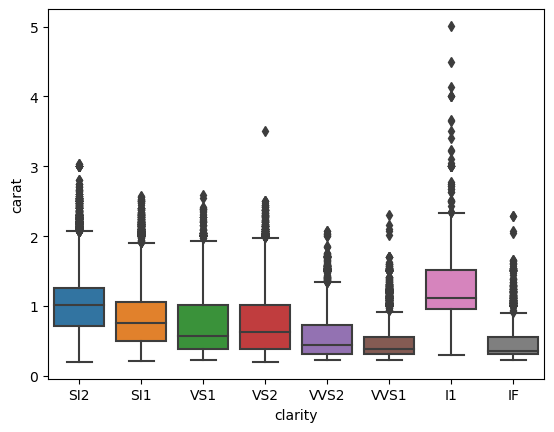

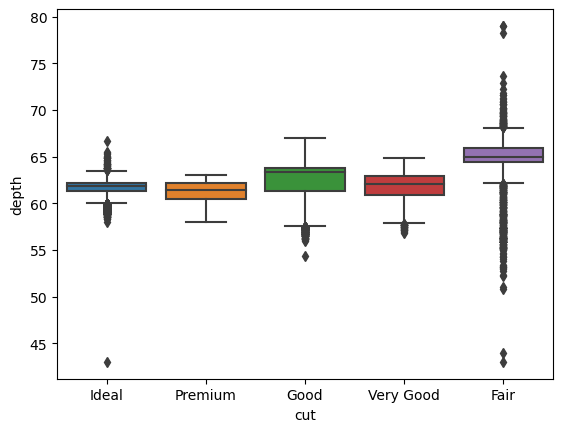

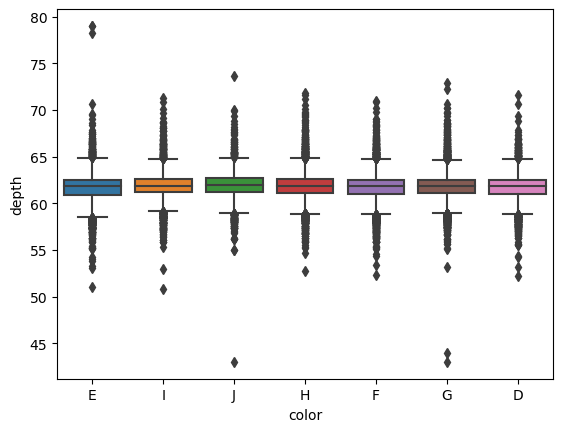

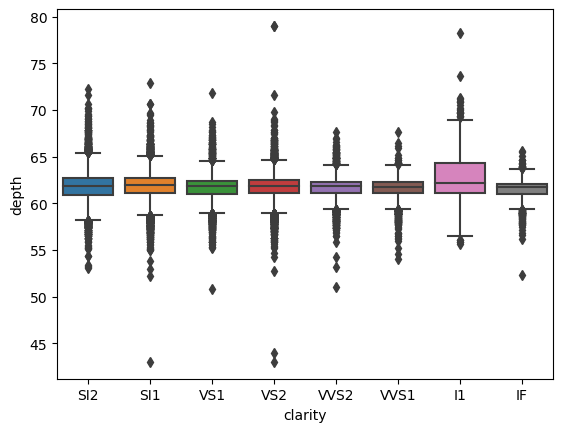

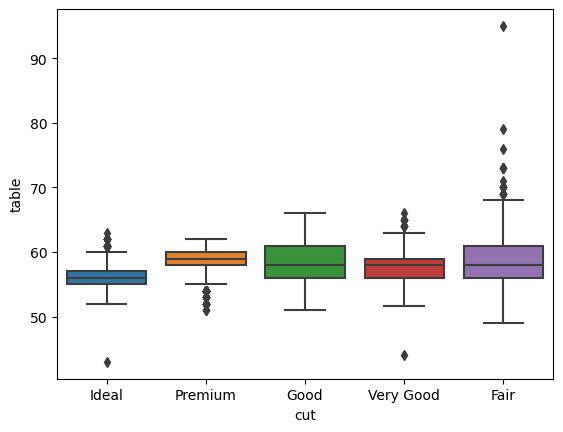

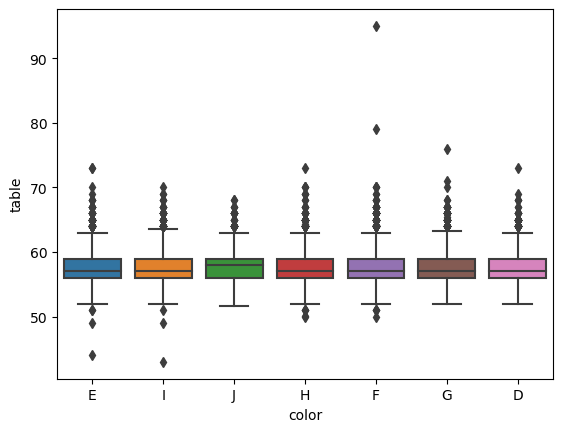

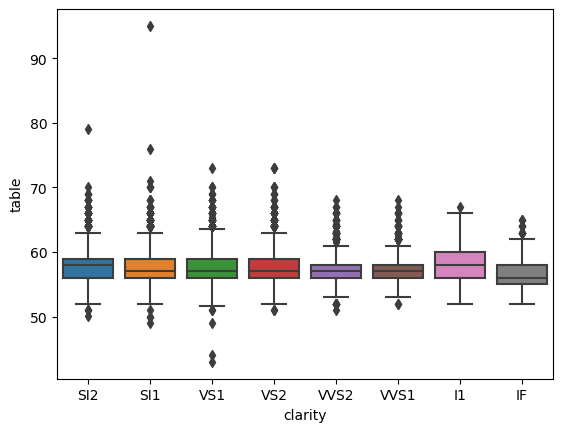

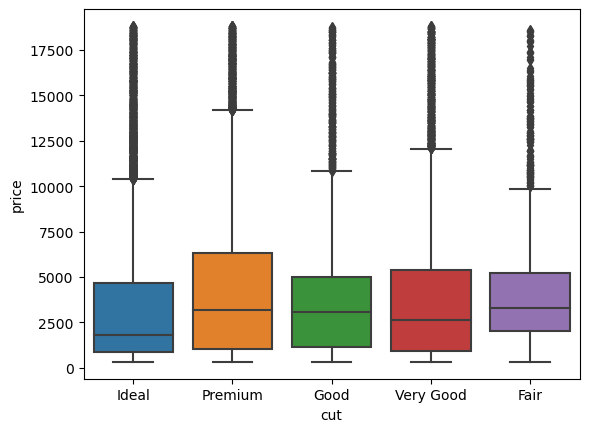

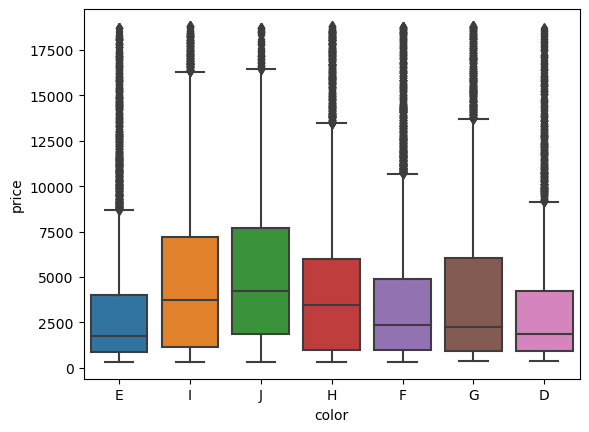

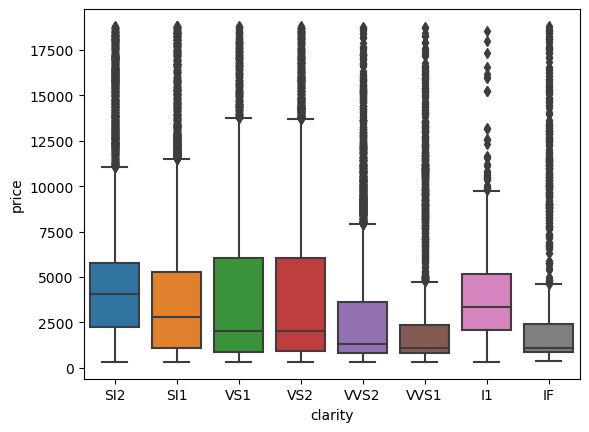

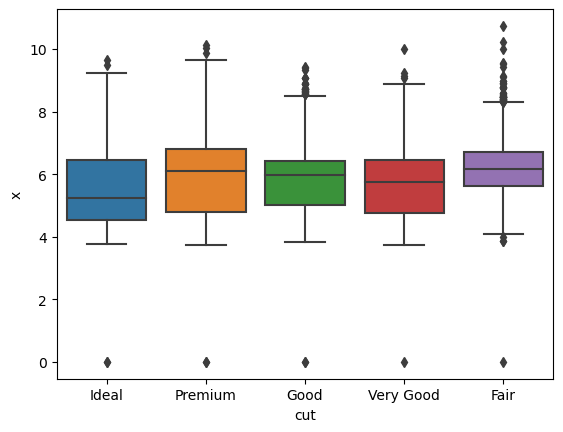

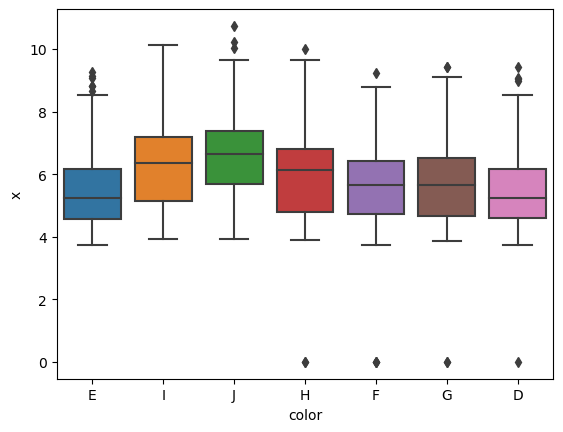

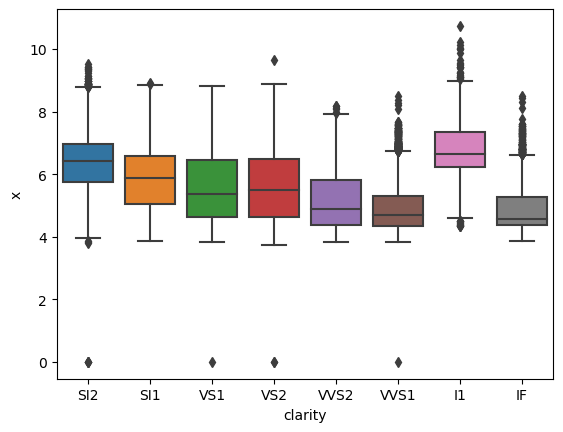

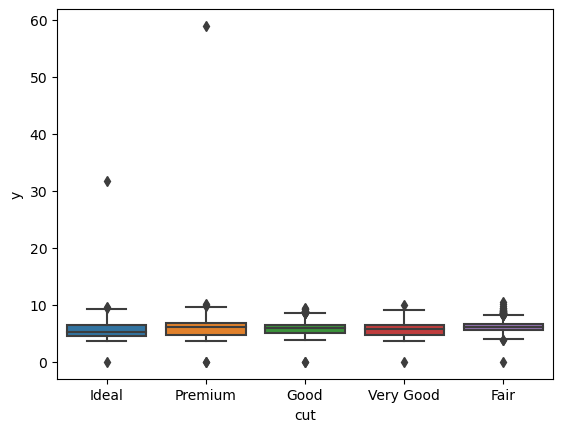

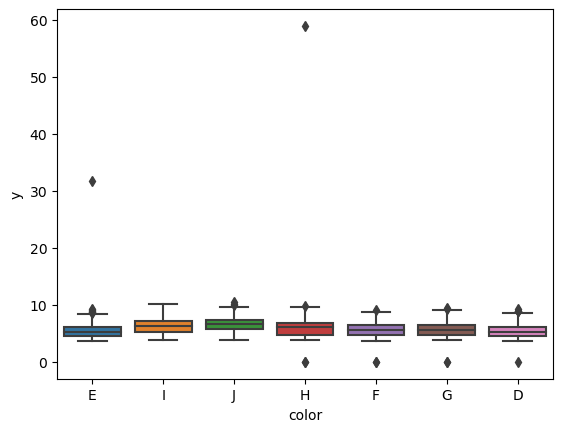

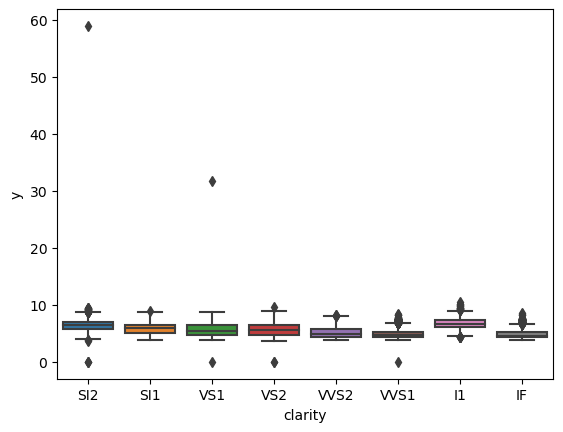

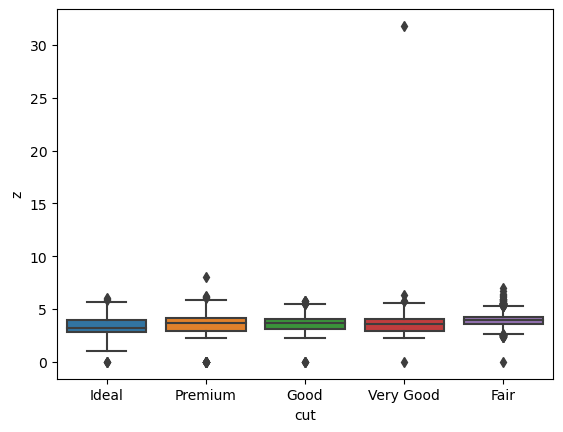

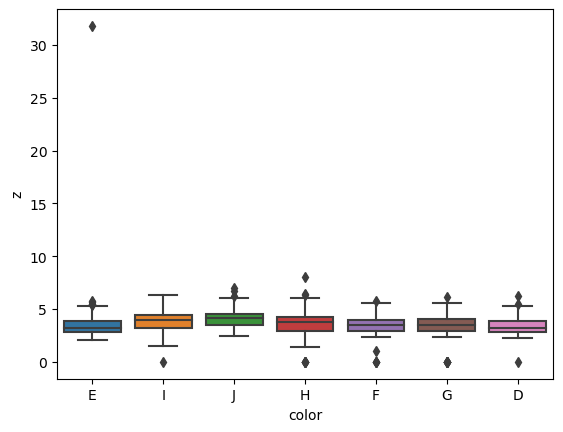

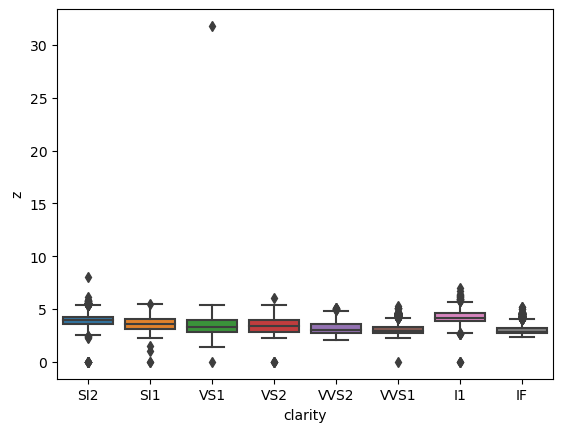

In [183]:
for num in df_num.columns:
    for col in df_cat.columns:
        sns.boxplot(data = df, x = col, y = num)
        plt.show()

### OHE - Categorical Features

In [184]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
df_encoded = pd.DataFrame(encode.fit_transform(df_cat).toarray(), columns=encode.get_feature_names_out())

In [185]:
df_encoded

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Scaling of Numeric Features

In [186]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_num = df_num.drop(columns='price')
df_scaled = min_max.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns= min_max.get_feature_names_out())
df_scaled

,carat,depth,table,x,y,z
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478
...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063
53936,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522
53937,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950
53938,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610


In [187]:
df_new= pd.concat([df_encoded, df_scaled,df.price], axis=1)

In [188]:
df_new

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z,price
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,326
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,326
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,327
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,334
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063,2757
53936,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522,2757
53937,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950,2757
53938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610,2757


In [189]:
df_new.isna().sum()

cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
dtype: int64

### VIF

In [190]:
X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
17891,0.216216,0.544444,0.211538,0.640596,0.116129,0.134906,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31277,0.024948,0.533333,0.307692,0.405028,0.074194,0.085220,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42191,0.068607,0.366667,0.403846,0.505587,0.091851,0.095912,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44443,0.066528,0.502778,0.250000,0.485102,0.088964,0.100314,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14855,0.220374,0.500000,0.307692,0.648976,0.117317,0.133019,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28746,0.022869,0.511111,0.211538,0.403166,0.074703,0.084277,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23522,0.278586,0.530556,0.365385,0.680633,0.125297,0.143396,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11486,0.207900,0.447222,0.346154,0.646182,0.118846,0.129560,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
46746,0.108108,0.488889,0.269231,0.547486,0.097284,0.110692,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [191]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [192]:
vif

,Features,VIF
0,carat,25.763307
1,depth,1.947995
2,table,1.755063
3,x,642.139631
4,y,640.083234
5,z,41.934610
6,cut_Fair,inf
7,cut_Good,inf
8,cut_Ideal,inf
9,cut_Premium,inf


In [193]:
y=df.price
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [194]:
df_new=pd.concat([df_scaled,df_encoded,y],axis = 1)

In [195]:
df_new.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,326
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,326
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,327
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,334
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,335


In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [146]:
X = df_new.drop(columns = 'price')
y = df_new.price

Regressor = []
R_sq_train = []
R_sq_test = []
train_MSE = []
test_MSE = []
train_MAPE = []
test_MAPE = []
MAPE_percent = []
# Split dataset into training and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

#### Linear Regression

In [70]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)
yhat_train = model.predict(X_train)
#LR_r_square_train = model.score(X_train,y_train)

yhat_test = model.predict(X_test)
#LR_r_square_test = model.score(X_test,yhat_test)



Regressor.append('Linear Regression')
R_sq_train.append(model.score(X_train,y_train))
R_sq_test.append(model.score(X_test,y_test))
train_MSE.append(mean_squared_error(y_train,yhat_train))
test_MSE.append(mean_squared_error(y_test, yhat_test))
train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))


train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_lr = np.mean(np.abs((train-test)/train))*100


MAPE_percent.append(mape_percent_lr)

#### Lasso regression

In [71]:
ls = Lasso()
model_ls = ls.fit(X_train,y_train)
yhat_train = model_ls.predict(X_train)
#Ls_r_square_train = model_ls.score(X_train,yhat_train)


yhat_test = model_ls.predict(X_test)
#Ls_r_square_test = model_ls.score(X_test,yhat_test)



Regressor.append('Lasso')
R_sq_train.append(model_ls.score(X_train,y_train))
R_sq_test.append(model_ls.score(X_test,y_test))
train_MSE.append(mean_squared_error(y_train,yhat_train))
test_MSE.append(mean_squared_error(y_test, yhat_test))
train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_ls = np.mean(np.abs((train-test)/train))*100


MAPE_percent.append(mape_percent_ls)

#### Ridge regression

In [73]:
ri = Ridge()
model_ri = ri.fit(X_train,y_train)
yhat_train = model_ri.predict(X_train)
#ri_r_square_train = model_ri.score(X_train,yhat_train)


yhat_test = model_ri.predict(X_test)
#Ls_r_square_test = model_ri.score(X_test,yhat_test)



Regressor.append('Ridge')
R_sq_train.append(model_ri.score(X_train,y_train))
R_sq_test.append(model_ri.score(X_test,y_test))
train_MSE.append(mean_squared_error(y_train,yhat_train))
test_MSE.append(mean_squared_error(y_test, yhat_test))
train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_precent_ri = np.mean(np.abs((train-test)/train))*100


MAPE_percent.append(mape_precent_ri)

#### Ada boost Regression

In [74]:
ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_ada = ada.fit(X_train,y_train)
yhat_train = model_ada.predict(X_train)
#ada_r_square_train = model_ada.score(X_train,yhat_train)


yhat_test = model_ada.predict(X_test)
#ada_r_square_test = model_ada.score(X_test,yhat_test)



Regressor.append('Ada boost regression')
R_sq_train.append(model_ada.score(X_train,y_train))
R_sq_test.append(model_ada.score(X_test,y_test))
train_MSE.append(mean_squared_error(y_train,yhat_train))
test_MSE.append(mean_squared_error(y_test, yhat_test))
train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_precent_ada = np.mean(np.abs((train-test)/train))*100


MAPE_percent.append(mape_precent_ada)

Ada boost Regression


#### DecisionTreeRegressor

In [75]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
yhat_train = model_dt.predict(X_train)
#LR_r_square_train = model_dt.score(X_train,yhat_train)
yhat_test = model_dt.predict(X_test)
#LR_r_square_test = model_dt.score(X_test,yhat_test)


Regressor.append('DT Regression')
R_sq_train.append(model_dt.score(X_train,y_train))
R_sq_test.append(model_dt.score(X_test,y_test))
train_MSE.append(mean_squared_error(y_train,yhat_train))
test_MSE.append(mean_squared_error(y_test, yhat_test))
train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_precent_dt = np.mean(np.abs((train-test)/train))*100


MAPE_percent.append(mape_precent_dt)

#### KNN

In [76]:
modelk = KNeighborsRegressor(n_neighbors = 3)
modelk.fit(X_train, y_train)
yhat_train = modelk.predict(X_train)
#LR_r_square_train = model_dt.score(X_train,yhat_train)
yhat_test = modelk.predict(X_test)
#LR_r_square_test = modelk.score(X_test,yhat_test)

Regressor.append('KNN Regression')
R_sq_train.append(modelk.score(X_train,y_train))
R_sq_test.append(modelk.score(X_test,y_test))
train_MSE.append(mean_squared_error(y_train,yhat_train))
test_MSE.append(mean_squared_error(y_test, yhat_test))
train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_precent_knn = np.mean(np.abs((train-test)/train))*100


MAPE_percent.append(mape_precent_knn)

#### RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf = rf.fit(X_train,y_train)
yhat_train = model_rf.predict(X_train)
#rf_r_square_train = model_rf.score(X_train,yhat_train)


yhat_test = model_rf.predict(X_test)
#rf_r_square_test = model_rf.score(X_test,yhat_test)

mse_test = mean_squared_error(y_test, yhat_test)
mape_test = mean_absolute_percentage_error(y_test,yhat_test)

Regressor.append('Random Forest regressor')
R_sq_train.append(model_rf.score(X_train,y_train))
R_sq_test.append(model_rf.score(X_test,y_test))

train_MSE.append(mean_squared_error(y_train,yhat_train))
test_MSE.append(mean_squared_error(y_test, yhat_test))
train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_precent_rf = np.mean(np.abs((train-test)/train))*100


MAPE_percent.append(mape_precent_rf)

In [78]:
results = {
        "Regressor": Regressor,
        "R_sq_train": R_sq_train,
        "R_sq_test": R_sq_test,
        "train_MSE": train_MSE,
        "test_MSE": test_MSE,
        "train_MAPE": train_MAPE,
        "test_MAPE": test_MAPE,
        "MAPE_percent":MAPE_percent}

In [80]:
Result=pd.DataFrame(results)
Result

,Regressor,R_sq_train,R_sq_test,train_MSE,test_MSE,train_MAPE,test_MAPE,MAPE_percent
0,Linear Regression,0.919848,0.919568,1.281111e+06,1.263570e+06,0.392275,0.392062,0.054333
1,Lasso,0.918833,0.918675,1.297337e+06,1.277597e+06,0.400203,0.399507,0.173880
2,Ridge,0.919552,0.919203,1.285833e+06,1.269299e+06,0.399396,0.398943,0.113334
3,Ridge,0.919552,0.919203,1.285833e+06,1.269299e+06,0.399396,0.398943,0.113334
4,Ada boost regression,0.873223,0.870451,2.026340e+06,2.035167e+06,0.249359,0.252279,1.171014
5,DT Regression,0.999995,0.956947,7.903813e+01,6.763523e+05,0.000211,0.091658,43279.927848
6,KNN Regression,0.983326,0.964667,2.665021e+05,5.550726e+05,0.071614,0.105368,47.132218


## Random Forest 

In [55]:
print('Random Forest Regreesor')
X = df_new.drop(columns = 'price')
y = df_new.price
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf = rf.fit(X_train,y_train)
yhat_train = model_rf.predict(X_train)
#rf_r_square_train = model_rf.score(X_train,yhat_train)


yhat_test = model_rf.predict(X_test)
#rf_r_square_test = model_rf.score(X_test,yhat_test)

R_sq_train = model_rf.score(X_train,y_train)
R_sq_test = model_rf.score(X_test,y_test)
train_MSE = mean_squared_error(y_train,yhat_train)
test_MSE = mean_squared_error(y_test, yhat_test)
train_MAPE = mean_absolute_percentage_error(y_train,yhat_train)
test_MAPE = mean_absolute_percentage_error(y_test,yhat_test)

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_ls = np.mean(np.abs((train-test)/train))*100



print(f" R square for train model is {R_sq_train}")
print(f" Mse of train data is {train_MSE}")
print(f"Mse of test data is {test_MSE}")
print(f"MAPE of train data is {train_MAPE}")
print(f"MAPE of test data is {test_MAPE}")

Random Forest Regreesor
 R square for train model is 0.996606382526524
 Mse of train data is 54241.89339591732
Mse of test data is 390081.8912464828
MAPE of train data is 0.02655821704023272
MAPE of test data is 0.07185026370735244


- **Apply grid searchCV**

In [67]:
# rf = RandomForestRegressor()

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 400],  # Number of trees in the forest
#     'max_depth': [None, 5, 10],  # Maximum depth of each tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# # Get the best model and its hyperparameters
# best_rf = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Print the best hyperparameters
# print("Best Hyperparameters:")
# print(best_params)


In [159]:
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [206]:
df_new=df_new.sample(1000)

In [207]:
print('Best Model after grid cv, Random Forest Regreesor')
X = df_new.drop(columns = 'price')
y = df_new.price
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 400)
model_rf = rf.fit(X_train,y_train)
yhat_train = model_rf.predict(X_train)
#rf_r_square_train = model_rf.score(X_train,yhat_train)


yhat_test = model_rf.predict(X_test)
#rf_r_square_test = model_rf.score(X_test,yhat_test)

R_sq_train = model_rf.score(X_train,y_train)
R_sq_test = model_rf.score(X_test,y_test)
train_MSE = mean_squared_error(y_train,yhat_train)
test_MSE = mean_squared_error(y_test, yhat_test)
train_MAPE = mean_absolute_percentage_error(y_train,yhat_train)
test_MAPE = mean_absolute_percentage_error(y_test,yhat_test)

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_ls = np.mean(np.abs((train-test)/train))*100


print(f" R square for train model is {R_sq_train}")
print(f" Mse of train data is {train_MSE}")
print(f"Mse of test data is {test_MSE}")
print(f"MAPE of train data is {train_MAPE}")
print(f"MAPE of test data is {test_MAPE}")

Best Model after grid cv, Random Forest Regreesor
 R square for train model is 0.9915923004592696
 Mse of train data is 134611.553693075
Mse of test data is 938379.53171725
MAPE of train data is 0.04846744740538884
MAPE of test data is 0.15232093431463983


## create a pickle file

In [208]:
import pickle

# Save the trained model as a pickle file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)


In [205]:
# pickle.dump(encode,open('encode.pkl','wb'))
# pickle.dump(min_max,open('scaled.pkl','wb'))